In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import json

In [24]:
import datetime as dt
from datetime import timedelta  

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func ,inspect
from flask import Flask, jsonify

In [26]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite" ,connect_args={'check_same_thread': False})

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [31]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [34]:
#maxDate=session.query(Measurement.date).value(func.max(Measurement.date))

maxDate=session.query(Measurement).value(func.max(Measurement.date))
maxDate_date = dt.datetime.strptime(maxDate, '%Y-%m-%d').date()
print(type(maxDate_date))
maxDate_date
maxDate_date - timedelta(days=365)

<class 'datetime.date'>


datetime.date(2016, 8, 23)

In [35]:
#determine query for parameterized API endpoint 
minDate='2016-8-23'

filtered_data=session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.date>=minDate).order_by(Measurement.date)
for x in filtered_data:
    print(x.date,x.tobs)


2017-01-01 62.0
2017-01-01 66.0
2017-01-01 74.0
2017-01-01 74.0
2017-01-01 72.0
2017-01-01 68.0
2017-01-02 66.0
2017-01-02 66.0
2017-01-02 74.0
2017-01-02 70.0
2017-01-02 70.0
2017-01-03 63.0
2017-01-03 65.0
2017-01-03 70.0
2017-01-03 73.0
2017-01-03 64.0
2017-01-03 71.0
2017-01-04 62.0
2017-01-04 64.0
2017-01-04 71.0
2017-01-04 73.0
2017-01-04 63.0
2017-01-04 70.0
2017-01-05 63.0
2017-01-05 65.0
2017-01-05 72.0
2017-01-05 71.0
2017-01-05 63.0
2017-01-05 71.0
2017-01-06 64.0
2017-01-06 70.0
2017-01-06 71.0
2017-01-06 74.0
2017-01-06 62.0
2017-01-06 65.0
2017-01-07 66.0
2017-01-07 72.0
2017-01-07 71.0
2017-01-07 72.0
2017-01-07 70.0
2017-01-07 70.0
2017-01-08 60.0
2017-01-08 62.0
2017-01-08 74.0
2017-01-08 74.0
2017-01-08 70.0
2017-01-08 66.0
2017-01-09 64.0
2017-01-09 65.0
2017-01-09 72.0
2017-01-09 65.0
2017-01-09 77.0
2017-01-09 62.0
2017-01-09 69.0
2017-01-10 63.0
2017-01-10 66.0
2017-01-10 72.0
2017-01-10 65.0
2017-01-10 75.0
2017-01-10 62.0
2017-01-10 64.0
2017-01-11 78.0
2017-01-

2017-04-29 70.0
2017-04-29 72.0
2017-04-29 68.0
2017-04-30 63.0
2017-04-30 61.0
2017-04-30 63.0
2017-04-30 64.0
2017-04-30 60.0
2017-04-30 58.0
2017-05-01 75.0
2017-05-01 68.0
2017-05-01 78.0
2017-05-01 73.0
2017-05-01 65.0
2017-05-01 73.0
2017-05-02 78.0
2017-05-02 73.0
2017-05-02 76.0
2017-05-02 78.0
2017-05-02 75.0
2017-05-02 79.0
2017-05-03 78.0
2017-05-03 74.0
2017-05-03 78.0
2017-05-03 78.0
2017-05-03 70.0
2017-05-04 78.0
2017-05-04 77.0
2017-05-04 77.0
2017-05-04 77.0
2017-05-04 75.0
2017-05-04 74.0
2017-05-05 79.0
2017-05-05 78.0
2017-05-05 78.0
2017-05-05 79.0
2017-05-05 70.0
2017-05-05 74.0
2017-05-06 79.0
2017-05-06 75.0
2017-05-06 78.0
2017-05-06 80.0
2017-05-06 79.0
2017-05-06 74.0
2017-05-07 79.0
2017-05-07 75.0
2017-05-07 78.0
2017-05-07 75.0
2017-05-07 70.0
2017-05-08 77.0
2017-05-08 71.0
2017-05-08 73.0
2017-05-08 80.0
2017-05-08 70.0
2017-05-08 66.0
2017-05-09 74.0
2017-05-09 79.0
2017-05-09 75.0
2017-05-09 67.0
2017-05-09 72.0
2017-05-10 78.0
2017-05-10 75.0
2017-05-

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#session.query(Measurement.date, Measurement.prcp).all()

filtered_data=session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date>=maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)\
.filter(Measurement.prcp!='None').order_by(Measurement.date)
#for x in filtered_data:
#    print(x.date,x.prcp)




filtered_data_df=pd.DataFrame(filtered_data)
#filtered_data_df2=filtered_data_df.set_index('date')
#filtered_data_df2.plot(rot=90)

filtered_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


In [37]:
filtered_date=session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date>'2012-11-15')\
.filter(Measurement.date<'2012-12-01')\
.filter(Measurement.prcp!='None')

#for x in filtered_date:
#    print(x.date,x.prcp)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data

myList=[{"Count": filtered_data_df2["prcp"].count(),
                 "Mean":filtered_data_df2["prcp"].mean(), 
                  "Std":filtered_data_df2["prcp"].std(),             
                  "Min":filtered_data_df2["prcp"].min(),
                  "Max":filtered_data_df2["prcp"].max() 
                }]
print(myList)

Summary_df=pd.DataFrame([{"Count": filtered_data_df2["prcp"].count(),
                 "Mean":filtered_data_df2["prcp"].mean(), 
                  "Std":filtered_data_df2["prcp"].std(),             
                  "Min":filtered_data_df2["prcp"].min(),
                  "Max":filtered_data_df2["prcp"].max() 
                }])



Count=filtered_data_df2["prcp"].count()
Mean=filtered_data_df2["prcp"].mean()
Std=filtered_data_df2["prcp"].std()
Min=filtered_data_df2["prcp"].min()
Max=filtered_data_df2["prcp"].max()

# I DON'T UNDERSTAND WHAT THE % is measuring 


filtered_data_df2.describe()


print(f'Precipitation\n____________________________\n'
+f'count {Count}\n')
     #'mean {Mean}\n')
     #(f'std {Std}\n')
     #(f'min {Min}\n')
     #(f'max {Max}\n')


#myDict={'Count':Count , 'Mean':Mean}
#myDict
#Summary_df


#filtered_data_df2.describe()


NameError: name 'filtered_data_df2' is not defined

In [41]:
filtered_data_df2.describe()


NameError: name 'filtered_data_df2' is not defined

![describe](Images/describe.png)

In [42]:
station_data=session.query(Station.id,Station.station)
for x in station_data:
    print(x.id,x.station)
    

1 USC00519397
2 USC00513117
3 USC00514830
4 USC00517948
5 USC00518838
6 USC00519523
7 USC00519281
8 USC00511918
9 USC00516128


In [43]:
station_data=session.query(Station.id,Station.station)
station_list=[]
for x in station_data:
    station_list.append(x.station)
    #print(x.station)
    
my_json_string ='{"stations" : '

my_json_string = my_json_string +json.dumps(station_list)  +'}' 
    
print(my_json_string)    

{"stations" : ["USC00519397", "USC00513117", "USC00514830", "USC00517948", "USC00518838", "USC00519523", "USC00519281", "USC00511918", "USC00516128"]}


In [44]:
station_data_simple_List=session.query(Station.station)
for x in station_data_simple_List:
    print(x)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [45]:
station_data
#station_data_df.to_dict()
station_data_df=pd.DataFrame(station_data)
station_data_df=station_data_df.set_index('id')
station_data_df


,station
id,
1,USC00519397
2,USC00513117
3,USC00514830
4,USC00517948
5,USC00518838
6,USC00519523
7,USC00519281
8,USC00511918
9,USC00516128


In [46]:
# Design a query to show how many stations are available in this dataset?


In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#filtered_data=session.query(Measurement.station, func_count((Measurement.station))

#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()
#.order_by(model.Entry.amount.desc())

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
maxTobs=session.query(Measurement).filter(Measurement.station=='USC00519281').value(func.max(Measurement.tobs))
maxTobs
minTobs=session.query(Measurement).filter(Measurement.station=='USC00519281').value(func.min(Measurement.tobs))
minTobs
avgTobs=session.query(Measurement).filter(Measurement.station=='USC00519281').value(func.avg(Measurement.tobs))
avgTobs

print(minTobs, maxTobs, avgTobs)

54.0 85.0 71.66378066378067


In [50]:
#determine query for parameterized API endpoint 
minDate='2016-8-23'
minTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.min(Measurement.tobs))
maxTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.max(Measurement.tobs))
avgTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.avg(Measurement.tobs))
json_string='{"minTobs:'+str(minTobs)+',"aveTobs":'+str(f'{avgTobs:.2f}')+',"maxTobs":'+str(maxTobs)+'}'

print(json_string)                                                                                                

{"minTobs:58.0,"aveTobs":74.14,"maxTobs":87.0}


In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?



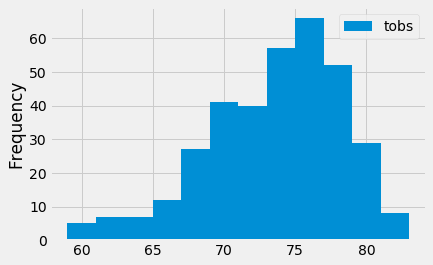

In [52]:
#filtered_tobs=session.query(Measurement.tobs, func.count(Measurement.date).label('Frequency'))\
filtered_tobs=session.query(Measurement.tobs)\
.filter(Measurement.date>maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)\
.filter(Measurement.station=='USC00519281')
#\
#.group_by(Measurement.tobs).order_by(Measurement.tobs).all()
filtered_tobs
filtered_tobs_df=pd.DataFrame(filtered_tobs)
#filtered_tobs_df=filtered_tobs_df.set_index('tobs')
filtered_tobs_df.plot.hist(bins=12)
#filtered_tobs_df['Frequency'].array
#filtered_tobs_df['tobs'].array
#filtered_tobs_df=pd.series(filtered_tobs)
#filtered_tobs_df


#x_axis=filtered_tobs_df['tobs'].array
#y_axis=filtered_tobs_df['Frequency'].array

#plt.bar(x_axis, y_axis )
#filtered_tobs-df.plt.hist(bins=12)

#plt.bar(x_axis, y_axis, facecolor="red", align='center', color = 'b' )


In [53]:
filtered_tobs_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


In [68]:
#Bin it
bins=[1,45,50,55,60,65,70,75,80,85,90,95]
group_names=['-45','50','55','60','65','70','75','80','85','90','95+']

filtered_tobs=session.query(Measurement.tobs, func.count(Measurement.date).label('frequency'))\
.filter(Measurement.date>maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)\
.filter(Measurement.station=='USC00519281')\
.group_by(Measurement.tobs).order_by(Measurement.tobs).all()
filtered_tobs
filtered_tobs_df=pd.DataFrame(filtered_tobs)
#filtered_tobs_df=filtered_tobs_df.set_index('tobs')
filtered_tobs_df
#filtered_tobs_df['Frequency'].array
#filtered_tobs_df['tobs'].array
#filtered_tobs_df=pd.series(filtered_tobs)
#filtered_tobs_df

#x_temp_ranges=pd.cut(filtered_tobs_df['tobs'],bins,group_names)
filtered_tobs_df["temp_range"]=pd.cut(filtered_tobs_df['tobs'],bins,group_names)
grouped=filtered_tobs_df['frequency'].groupby(filtered_tobs_df['temp_range'])
grouped.head()


#grouped=filtered_tobs_df[["temp_range","frequency"]]
grouped=filtered_tobs_df[["temp_range","frequency"]].groupby(filtered_tobs_df['temp_range'])
grouped.head()

filtered_tobs_df["temp_range"].unique()
#x_temp_ranges
#x_axis=filtered_tobs_df['tobs'].array
#y_axis=filtered_tobs_df['Frequency'].array

#plt.bar(x_axis, y_axis )

#plt.bar(x_axis, y_axis, facecolor="red", align='center', color = 'b' )

[(55, 60], (60, 65], (65, 70], (70, 75], (75, 80], (80, 85]]
Categories (6, interval[int64]): [(55, 60] < (60, 65] < (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [54]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
filtered_tobs=session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.date>maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)\
.filter(Measurement.station=='USC00519281').order_by(Measurement.date)
filtered_tobs
for x in filtered_tobs:
    print(x.date, x.tobs)

2016-08-24 77.0
2016-08-25 80.0
2016-08-26 80.0
2016-08-27 75.0
2016-08-28 73.0
2016-08-29 78.0
2016-08-30 77.0
2016-08-31 78.0
2016-09-01 80.0
2016-09-02 80.0
2016-09-03 78.0
2016-09-04 78.0
2016-09-05 78.0
2016-09-06 73.0
2016-09-07 74.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 77.0
2016-09-11 80.0
2016-09-12 76.0
2016-09-13 79.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 78.0
2016-09-17 79.0
2016-09-18 78.0
2016-09-19 78.0
2016-09-20 76.0
2016-09-21 74.0
2016-09-22 77.0
2016-09-23 78.0
2016-09-24 79.0
2016-09-25 79.0
2016-09-26 77.0
2016-09-27 80.0
2016-09-28 78.0
2016-09-29 78.0
2016-09-30 78.0
2016-10-01 77.0
2016-10-02 79.0
2016-10-03 79.0
2016-10-04 79.0
2016-10-05 79.0
2016-10-06 75.0
2016-10-07 76.0
2016-10-08 73.0
2016-10-09 72.0
2016-10-10 71.0
2016-10-11 77.0
2016-10-12 79.0
2016-10-13 78.0
2016-10-14 79.0
2016-10-15 77.0
2016-10-16 79.0
2016-10-17 77.0
2016-10-18 78.0
2016-10-19 78.0
2016-10-20 78.0
2016-10-21 78.0
2016-10-22 77.0
2016-10-23 74.0
2016-10-24 75.0
2016-10-

In [55]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
filtered_tobs=session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.date>maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)\
.filter(Measurement.station=='USC00519281').order_by(Measurement.date)
filtered_tobs
for x in filtered_tobs:
    print(x.date, x.tobs)

2016-08-24 77.0
2016-08-25 80.0
2016-08-26 80.0
2016-08-27 75.0
2016-08-28 73.0
2016-08-29 78.0
2016-08-30 77.0
2016-08-31 78.0
2016-09-01 80.0
2016-09-02 80.0
2016-09-03 78.0
2016-09-04 78.0
2016-09-05 78.0
2016-09-06 73.0
2016-09-07 74.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 77.0
2016-09-11 80.0
2016-09-12 76.0
2016-09-13 79.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 78.0
2016-09-17 79.0
2016-09-18 78.0
2016-09-19 78.0
2016-09-20 76.0
2016-09-21 74.0
2016-09-22 77.0
2016-09-23 78.0
2016-09-24 79.0
2016-09-25 79.0
2016-09-26 77.0
2016-09-27 80.0
2016-09-28 78.0
2016-09-29 78.0
2016-09-30 78.0
2016-10-01 77.0
2016-10-02 79.0
2016-10-03 79.0
2016-10-04 79.0
2016-10-05 79.0
2016-10-06 75.0
2016-10-07 76.0
2016-10-08 73.0
2016-10-09 72.0
2016-10-10 71.0
2016-10-11 77.0
2016-10-12 79.0
2016-10-13 78.0
2016-10-14 79.0
2016-10-15 77.0
2016-10-16 79.0
2016-10-17 77.0
2016-10-18 78.0
2016-10-19 78.0
2016-10-20 78.0
2016-10-21 78.0
2016-10-22 77.0
2016-10-23 74.0
2016-10-24 75.0
2016-10-

In [56]:
 myfiltered_df=pd.DataFrame(filtered_tobs)
 myfiltered_df=myfiltered_df.set_index('date')
 myfiltered_df.head()   

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


In [21]:
myfiltered_df.head()

NameError: name 'myfiltered_df' is not defined

In [72]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



#y_axis=myfiltered_df["tobs"].to_numpy()
y_axis=myfiltered_df["tobs"].array
y_axis


<PandasArray>
[77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0, 80.0,
 ...
 76.0, 77.0, 82.0, 83.0, 77.0, 77.0, 77.0, 76.0, 76.0, 79.0]
Length: 351, dtype: float64

In [73]:
myfiltered_df.groupby('tobs').count()

""
tobs
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0


![precipitation](Images/station-histogram.png)

In [74]:
#Instructions would need to filter on station for dates to be unique

filtered_tobs_api=session.query(Measurement.date,Measurement.tobs)\
.filter(Measurement.date>maxDate_date - timedelta(days=365))\
.filter(Measurement.date<=maxDate_date)

myfiltered_api_df=pd.DataFrame(filtered_tobs_api)
myfiltered_api_df=myfiltered_df.set_index('date')
myfiltered_api_df.head() 

KeyError: "None of ['date'] are in the columns"

In [ ]:
# def query1(measureDate):
#     minDate=measureDate
#     minTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.min(Measurement.tobs))
#     maxTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.max(Measurement.tobs))
#     avgTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.avg(Measurement.tobs))
#     json_string='{"minTobs:'+str(minTobs)+',"aveTobs":'+str(f'{avgTobs:.2f}')+',"maxTobs":'+str(maxTobs)+'}'
#     print(json_string)   

    
# query1('20160823')    

In [75]:
def query2(minDate, maxDate=dt.datetime.now()):
    minTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.min(Measurement.tobs))
    maxTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.max(Measurement.tobs))
    avgTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.avg(Measurement.tobs))
    json_string='{"minTobs:'+str(minTobs)+',"aveTobs":'+str(f'{avgTobs:.2f}')+',"maxTobs":'+str(maxTobs)+'}'
    #print (minTobs,avgTobs,maxTobs)
    return json_string   

query2('20150823','20170823' )

'{"minTobs:56.0,"aveTobs":74.14,"maxTobs":87.0}'

In [ ]:
#Flask Work
# 1. Import Flask
#from flask import Flask, jsonify


def query1(measureDate):
    minDate=measureDate
    minTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.min(Measurement.tobs))
    maxTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.max(Measurement.tobs))
    avgTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).value(func.avg(Measurement.tobs))
    json_string='{"minTobs:'+str(minTobs)+',"aveTobs":'+str(f'{avgTobs:.2f}')+',"maxTobs":'+str(maxTobs)+'}'
    return json_string   

def tempStats(minDate, maxDate=dt.datetime.now()):
    minTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.min(Measurement.tobs))
    maxTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.max(Measurement.tobs))
    avgTobs=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=minDate).filter(Measurement.date<=maxDate).value(func.avg(Measurement.tobs))
    json_string='{"minTobs:'+str(minTobs)+',"aveTobs":'+str(f'{avgTobs:.2f}')+',"maxTobs":'+str(maxTobs)+'}'
    #print (minTobs,avgTobs,maxTobs)
    return json_string   
 
    

# 2. Create an app
app = Flask(__name__)
# 3. Define static routes
@app.route("/")
def index():
      routes='Routes:<br>\
            <ul>\
            <li>/\
            <li><a href="/api/v1.0/precipitation\">/api/v1.0/precipitation\</a>
            <li>/api/v1.0/stations\
            <li>/api/v1.0/tobs\
            </ul>'   
      return routes


@app.route("/about")
def about():
    myResponse = "about"
    return myResponse


@app.route("/api/v1.0/precipitation")
def precipitation():
    #myResponse = {"precipitation" : "Value"}
    myResponse=filtered_data_df2.to_dict()
    return jsonify(myResponse)

@app.route("/api/v1.0/stations")
def stations():
    #myResponse=station_data_df.to_dict()
    myResponse=my_json_string
    #myResponse = "stations"
    return myResponse

@app.route("/api/v1.0/tobs")
def tobs():
    myResponse = myfiltered_df.to_dict()
    return jsonify(myResponse)

@app.route("/api/v1.0/<start>")
def start(start):
    json_string=tempStats(start)
    return json_string
    #return jsonify(start)

@app.route("/api/v1.0/<start>/<end>")
def startEnd(start,end):
    json_string=tempStats(start,end)
    return json_string
    #return jsonify(start)
    


# 4. Define main behavior
if __name__ == "__main__":
       app.run()
    #    app.run(debug=True)
    


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Feb/2020 01:59:43] "GET /api/v1.0/2015-08-23/2017-08-23 HTTP/1.1" 200 -
127.0.0.1 - - [15/Feb/2020 01:59:52] "GET /api/v1.0/2015-08-23 HTTP/1.1" 200 -
127.0.0.1 - - [15/Feb/2020 01:59:55] "GET /api/v1.0/2015-08-23 HTTP/1.1" 200 -
127.0.0.1 - - [15/Feb/2020 02:00:12] "GET /api/v1.0/2015-08-23/2015-08-23 HTTP/1.1" 200 -
127.0.0.1 - - [15/Feb/2020 02:00:25] "GET /api/v1.0/2015-08-23/2017-08-23 HTTP/1.1" 200 -


In [ ]:
%tb


In [5]:
routes='''Routes:\
            <ul>
            <li><a href="/api/v1.0/precipitation">/api/v1.0/precipitation</a>
            <li><a href="/api/v1.0/station">/api/v1.0/station</a>
            <li><a href="/api/v1.0/tobs">/api/v1.0/tobs</a>
            <li><a href="/api/v1.0/<start>">/api/v1.0/<start></a>
            <li><a href="/api/v1.0/<start>/<end>">/api/v1.0/<start>/<end></a>
            </ul>'''

SyntaxError: EOL while scanning string literal (<ipython-input-5-4f4dd7dfe524>, line 2)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
